In [5]:
# Importing Dependencies

import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [6]:
import os
import cv2 as cv
import numpy as np

# Setting Path and Reshaping
dir = "C:\\Users\\VINIT\\Desktop\\Prodigy Infotech\\PRODIGY_ML_03\\Dataset"
categories = ['Cat', 'Dog']
data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    # Print the path for debugging
    print(f"Checking path: {path}")
    
    # Check if the directory exists
    if not os.path.exists(path):
        print(f"Directory does not exist: {path}")
        continue  # Skip to the next category
    
    # Print directory contents for debugging
    files = os.listdir(path)
    print(f"Contents of {path}: {files}")
    
    for img in files:
        imgpath = os.path.join(path, img)
        pet_img = cv.imread(imgpath, 0)
        
        # Check if image is read correctly
        if pet_img is None:
            print(f"Failed to read image: {imgpath}")
            continue
        
        try:
            pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
            # print(pet_img.shape)
        except Exception as e:
            print(f"Error processing image {imgpath}: {e}")
            continue
        
        image = np.array(pet_img).flatten()
        data.append([image, label])
        print(f"Processed image: {imgpath}, Total images processed: {len(data)}")

print(f"Total images processed: {len(data)}")


Checking path: C:\Users\VINIT\Desktop\Prodigy Infotech\PRODIGY_ML_03\Dataset\Cat
Contents of C:\Users\VINIT\Desktop\Prodigy Infotech\PRODIGY_ML_03\Dataset\Cat: ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg', 'cat.1007.jpg', 'cat.1008.jpg', 'cat.1009.jpg', 'cat.101.jpg', 'cat.1010.jpg', 'cat.1011.jpg', 'cat.1012.jpg', 'cat.1013.jpg', 'cat.1014.jpg', 'cat.1015.jpg', 'cat.1016.jpg', 'cat.1017.jpg', 'cat.1018.jpg', 'cat.1019.jpg', 'cat.102.jpg', 'cat.1020.jpg', 'cat.1021.jpg', 'cat.1022.jpg', 'cat.1023.jpg', 'cat.1024.jpg', 'cat.1025.jpg', 'cat.1026.jpg', 'cat.1027.jpg', 'cat.1028.jpg', 'cat.1029.jpg', 'cat.103.jpg', 'cat.1030.jpg', 'cat.1031.jpg', 'cat.1032.jpg', 'cat.1033.jpg', 'cat.1034.jpg', 'cat.1035.jpg', 'cat.1036.jpg', 'cat.1037.jpg', 'cat.1038.jpg', 'cat.1039.jpg', 'cat.104.jpg', 'cat.1040.jpg', 'cat.1041.jpg', 'cat.1042.jpg', 'cat.1043.jpg', 'cat.1044.jpg', 'cat.1045.jpg', '

In [7]:
random.shuffle(data)

features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)
print(features)
print(labels)

[array([43, 47, 49, ..., 72, 71, 70], dtype=uint8), array([153, 170, 182, ..., 179, 174, 165], dtype=uint8), array([150, 150, 148, ...,  86,  94, 122], dtype=uint8), array([130, 146, 155, ..., 160, 153, 141], dtype=uint8), array([ 51,  60,  59, ..., 230, 231, 232], dtype=uint8), array([150, 176, 147, ..., 121,  93, 110], dtype=uint8), array([207, 207, 209, ...,  83,  93, 101], dtype=uint8), array([ 81,  88,  94, ..., 108, 105, 100], dtype=uint8), array([ 30,  33,  22, ..., 175, 166, 175], dtype=uint8), array([ 58,  58,  58, ..., 150, 151, 151], dtype=uint8), array([107, 101,  98, ..., 131,  98, 102], dtype=uint8), array([168, 168, 168, ..., 197, 196, 194], dtype=uint8), array([ 25,  16,  16, ..., 142, 163, 164], dtype=uint8), array([124, 126, 127, ..., 196, 201, 197], dtype=uint8), array([ 51,  53,  52, ..., 125, 121, 121], dtype=uint8), array([243, 243, 243, ...,  65, 101,  74], dtype=uint8), array([166, 158, 121, ...,  50,  70,  67], dtype=uint8), array([  6,   7,  41, ..., 158, 152,

In [8]:
# Splitting the Dataset

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [9]:
# Training the model

model = SVC(C=1, kernel='poly', gamma='auto') 
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

Accuracy : 0.565896314803248
Prediction is Cat


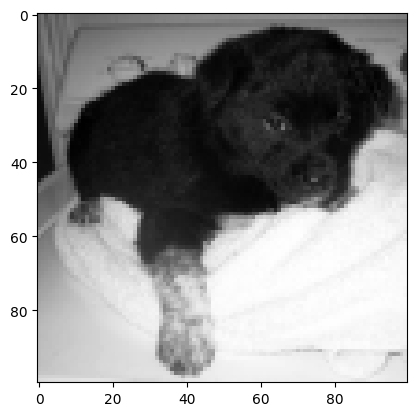

In [10]:
# Testing the model

mypet = x_test[2].reshape(100,100)
prediction = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print('Accuracy :', accuracy)
print('Prediction is', categories[prediction[2]])
plt.imshow(mypet, cmap ='gray')
plt.show()